<a href="https://colab.research.google.com/github/somitrasingh/machine_learning/blob/main/Student_performace_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

# Replace with your actual values
os.environ['KAGGLE_USERNAME'] = 'somitra07'
os.environ['KAGGLE_KEY'] = '319b54744b938ac561d3e6b01cbd4791'

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")

print("Path to dataset files:", path)

100%|██████████| 48.5k/48.5k [00:00<00:00, 27.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nikhil7280/student-performance-multiple-linear-regression/versions/1


In [5]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/nikhil7280/student-performance-multiple-linear-regression/versions/1/Student_Performance.csv')

In [21]:
df.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
2245,3,60,Yes,8,2,38.0
5899,8,74,Yes,5,0,68.0
6244,7,79,Yes,9,9,74.0
5041,9,52,Yes,9,6,51.0
5118,4,49,Yes,8,9,33.0


In [6]:
df.shape

(10000, 6)

In [7]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [8]:
df.duplicated().sum()

np.int64(127)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

In [41]:
df.isna()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
9995,False,False,False,False,False,False
9996,False,False,False,False,False,False
9997,False,False,False,False,False,False
9998,False,False,False,False,False,False


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


In [24]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].astype(bool)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   bool   
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: bool(1), float64(1), int64(4)
memory usage: 472.4 KB


In [14]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


<Axes: >

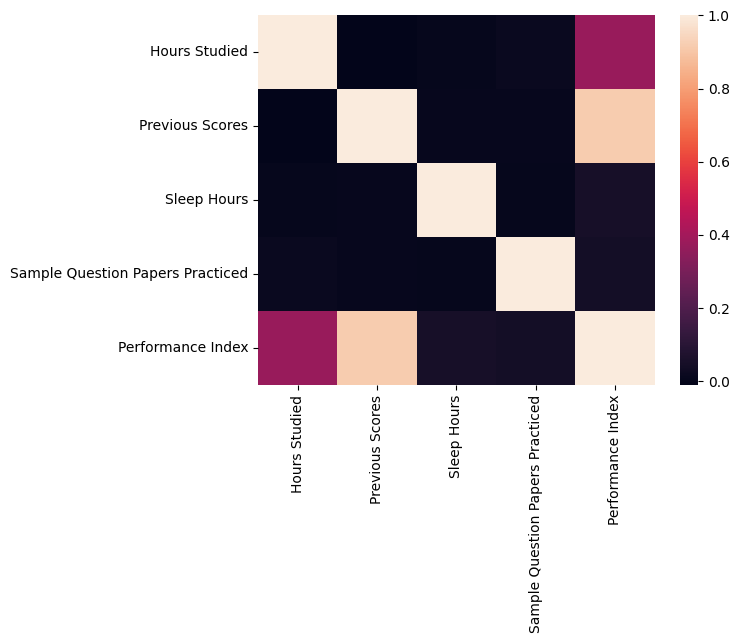

In [17]:
sns.heatmap(df.corr(numeric_only=True))

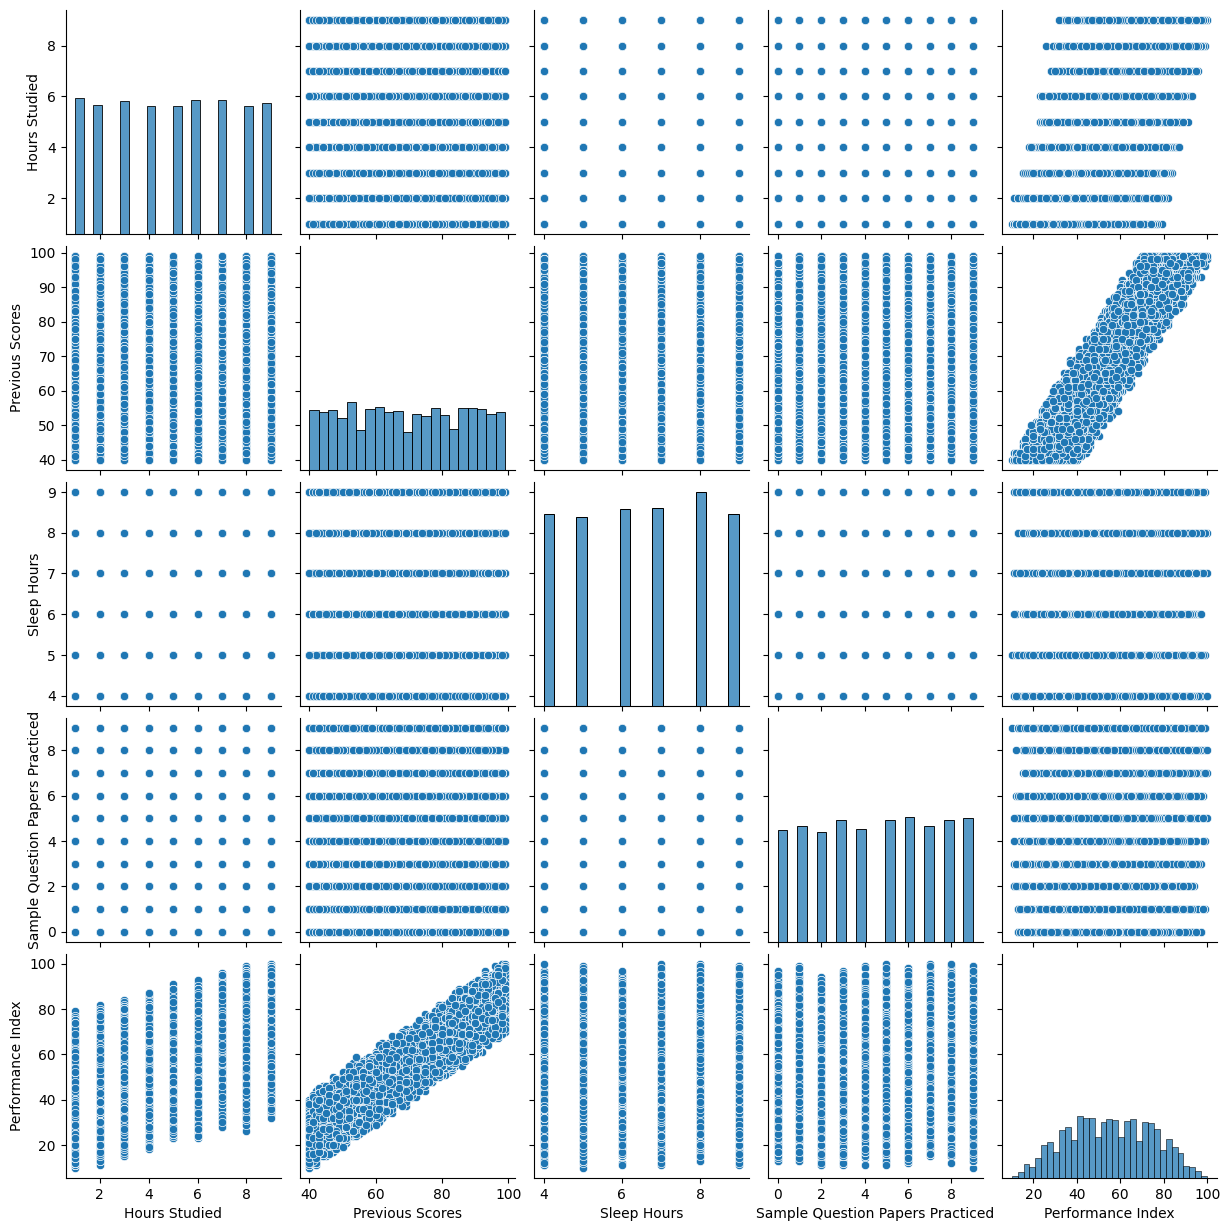

In [19]:
sns.pairplot(df)

In [97]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Performance Index']), df['Performance Index'], test_size=0.2, random_state=42)

In [76]:
print(LinearRegression().get_params())
print(SGDRegressor().get_params())
print(RandomForestRegressor().get_params())
print(XGBRegressor().get_params())
print(GradientBoostingRegressor().get_params())
print(AdaBoostRegressor().get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
{'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_error', 'max_iter': 1000, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'co

In [95]:
features_to_scale = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

scale_std = ColumnTransformer([
    ('scale', StandardScaler(), features_to_scale)
], remainder='passthrough')

scale_mm = ColumnTransformer([
    ('scale', MinMaxScaler(), features_to_scale)
], remainder='passthrough')

In [96]:
pipe = Pipeline([
    ('scale', scale_std),
    ('regressor', LinearRegression())
])

In [90]:
param_grid = [
    {
        'scale': [scale_std, scale_mm],
        'regressor': [LinearRegression()],
        'regressor__fit_intercept': [True, False]
    },
    {
        'scale': [scale_std, scale_mm],
        'regressor': [SGDRegressor()],
        'regressor__l1_ratio': [0.1, 0.33, 0.66, 0.99],
        'regressor__eta0': [0.0001, 0.001, 0.01, 0.1]

    },
    {
        'scale': [scale_std, scale_mm],
        'regressor': [RandomForestRegressor()],
        'regressor__max_features': ['sqrt', 'log2', 'None'],
        'regressor__n_estimators': [10, 20, 50, 70, 100, 200]
    },
    {
        'scale': [scale_std, scale_mm],
        'regressor': [XGBRegressor()],
        'regressor__n_estimators': [10, 20, 50, 70, 100, 200]
    },
    {
        'scale': [scale_std, scale_mm],
        'regressor': [GradientBoostingRegressor()],
        'regressor__learning_rate': [0.05, 0.1, 0.2, 0.4]
    },
    {
        'scale': [scale_std, scale_mm],
        'regressor': [AdaBoostRegressor()],
        'regressor__estimator': [LinearRegression(), SGDRegressor(), None],
        'regressor__n_estimators': [10, 20, 50, 70, 100, 200]
    }
]

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", l

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scale',
                                                                         StandardScaler(),
                                                                         ['Hours '
                                                                          'Studied',
                                                                          'Previous '
                                                                          'Scores',
                                                                          'Sleep '
                                                                          'Hours',
                                                                          'Sample '
                                                                          'Question '
                                                                          'Papers '
                                                                          'Practiced'])])),
                                       ('regressor', LinearRegression())]),
             n_jobs=-1,
             param_grid=[{'regressor': [LinearRegression()],
                          'regressor__fit_intercept': [T...
                          'scale': [ColumnTransformer(remainder='passthrough',
                                                      transformers=[('scale',
                                                                     StandardScaler(),
                                                                     ['Hours '
                                                                      'Studied',
                                                                      'Previous '
                                                                      'Scores',
                                                                      'Sleep '
                                                                      'Hours',
                                                                      'Sample '
                                                                      'Question '
                                                                      'Papers '
                                                                      'Practiced'])]),
                                    ColumnTransformer(remainder='passthrough',
                                                      transformers=[('scale',
                                                                     MinMaxScaler(),
                                                                     ['Hours '
                                                                      'Studied',
                                                                      'Previous '
                                                                      'Scores',
                                                                      'Sleep '
                                                                      'Hours',
                                                                      'Sample '
                                                                      'Question '
                                                                      'Papers '
                                                                      'Practiced'])])]}])

In [91]:
grid.best_estimator_

Pipeline(steps=[('scale',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['Hours Studied',
                                                   'Previous Scores',
                                                   'Sleep Hours',
                                                   'Sample Question Papers '
                                                   'Practiced'])])),
                ('regressor', SGDRegressor(eta0=0.001, l1_ratio=0.99))])

In [92]:
grid.best_params_

{'regressor': SGDRegressor(),
 'regressor__eta0': 0.001,
 'regressor__l1_ratio': 0.99,
 'scale': ColumnTransformer(remainder='passthrough',
                   transformers=[('scale', StandardScaler(),
                                  ['Hours Studied', 'Previous Scores',
                                   'Sleep Hours',
                                   'Sample Question Papers Practiced'])])}

In [93]:
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

In [98]:
r2_score(y_test, y_pred_best)

0.988043548964918